# Debut

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import normaltest, kstest
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score,roc_curve,confusion_matrix,average_precision_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder,OneHotEncoder

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster




from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df = pd.read_csv("Churn Telco.csv", sep =',')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges doit etre converti en entier 

SeniorCitizen doit etre converti en category

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

il n'y a pas de donnees manquantes 

In [8]:
df.duplicated().sum()

np.int64(0)

nous n'avons pas de doublons

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Nous constatons qu'apres conversion de la colonne TotalCharges en entier, nous avons 11 valeurs manquantes. Il serait judicieux de voir pourquoi elles sont manquantes avant de faire une quelconque operation

In [12]:
df.loc[df['TotalCharges'].isnull(), :]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Un constat est que la majorite des clients ont une tenure = 0 qui signifie que ce sont de nouveaux clients.

Ils n'apportent pas de grande information sur le churn qu'on cherche a predire, on va les retier et les garder pour une analyse cohorte par exemple mais pour ca il faut le temps pou voir si ils ce sont inscrits la meme periode

In [13]:
nouveaux_clients = df[df['tenure'] == 0]
df.dropna(subset=['TotalCharges'], inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.shape

(7032, 21)

In [15]:
df.drop(columns=['customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} : {outliers[col].shape[0]} valeurs aberrantes")

tenure : 0 valeurs aberrantes
MonthlyCharges : 0 valeurs aberrantes
TotalCharges : 0 valeurs aberrantes


In [17]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# EDA

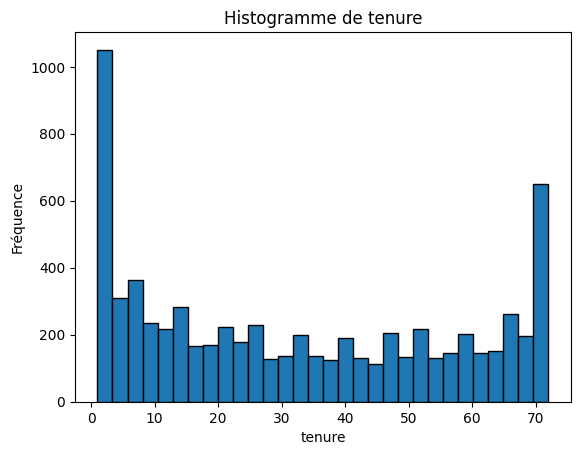

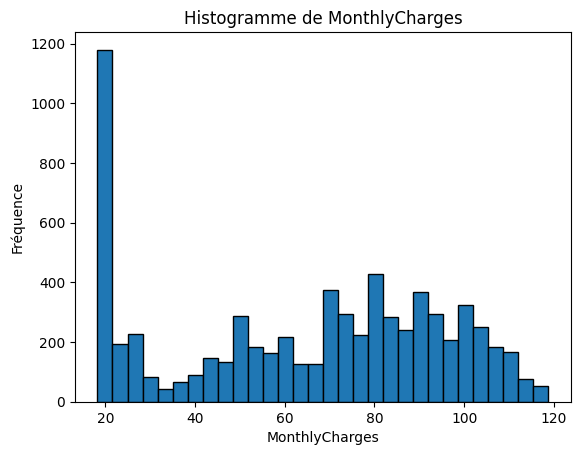

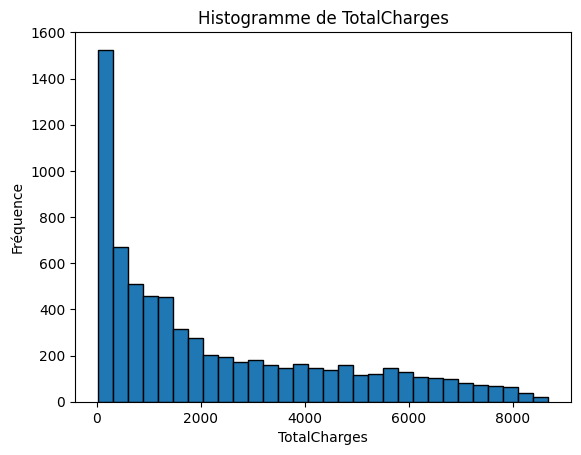

In [18]:
for col in numeric_cols:
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

Nous constatons que la majorite des personnes ont une tenure a 1 suivi de ceux aui durent 70 et plus. Peut-etre serait ce un facteur de churn? les clients doutent encore sur leur choix

En majorite les clients payent par mois 20. les clients avec un faible prix par mois serait-il plus susceptible a quitter?

Nous avons une distribution asymetrique a droite de TotalCharges. la majorite des clients sont entre 0 et 1000. 
une minorite des charges est tres eleve. sont-ils des clients fideles
ceux avec une charge totale inferieure viennent-ils de souscrire et doutent ?

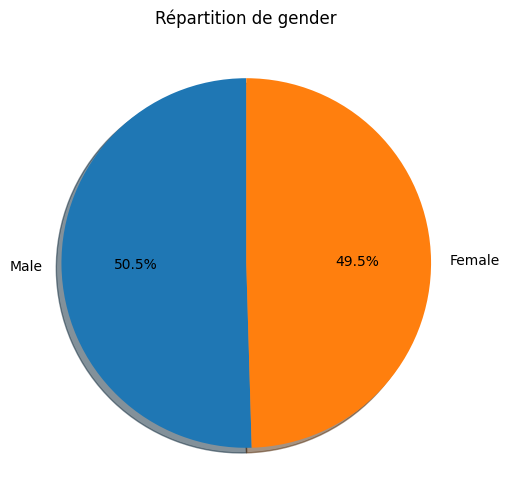

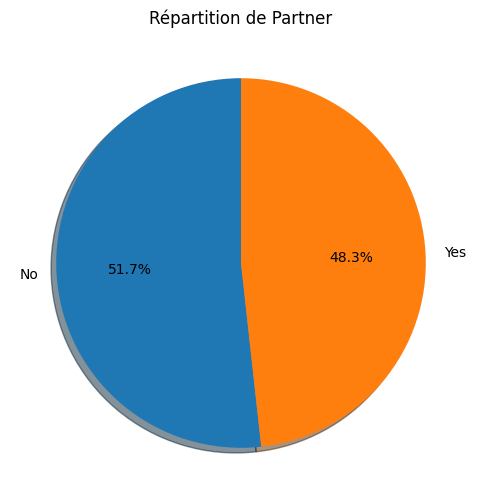

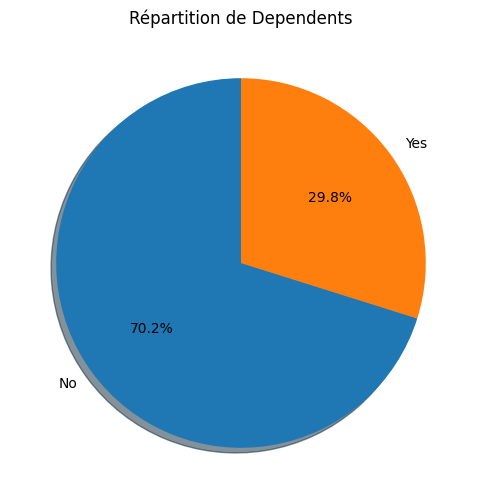

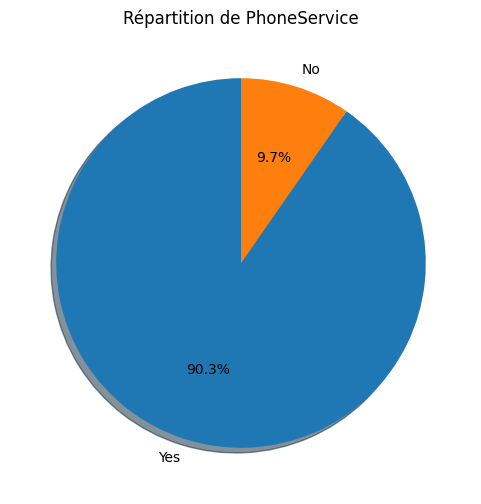

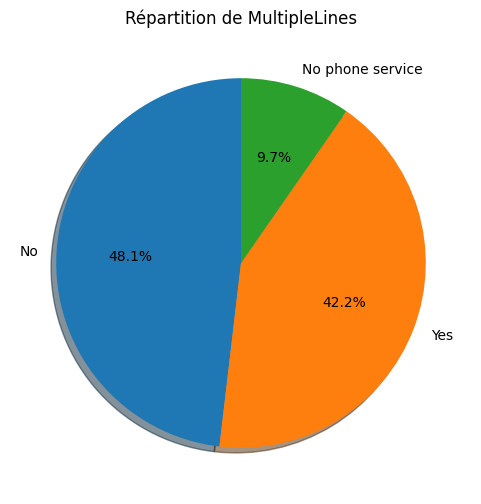

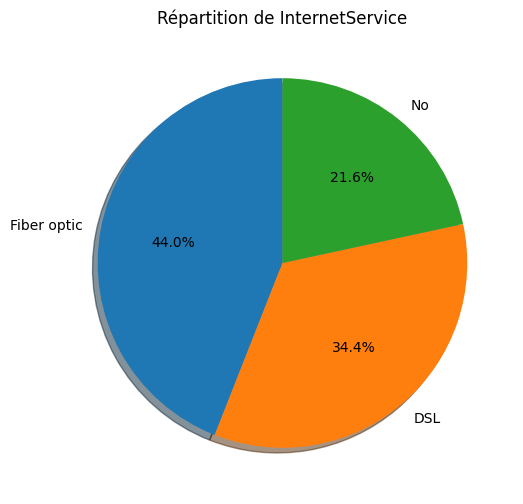

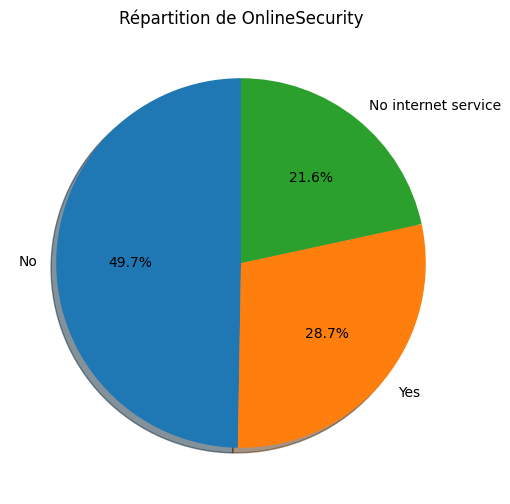

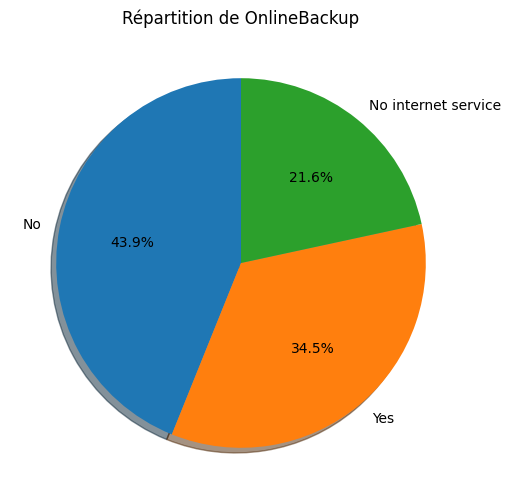

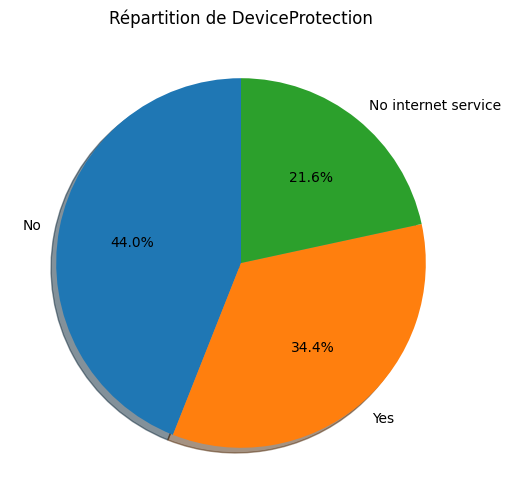

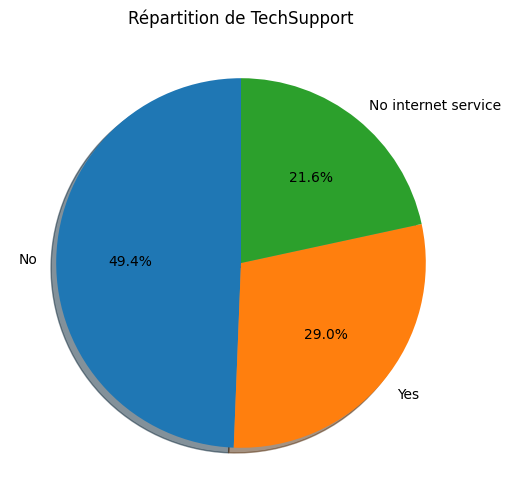

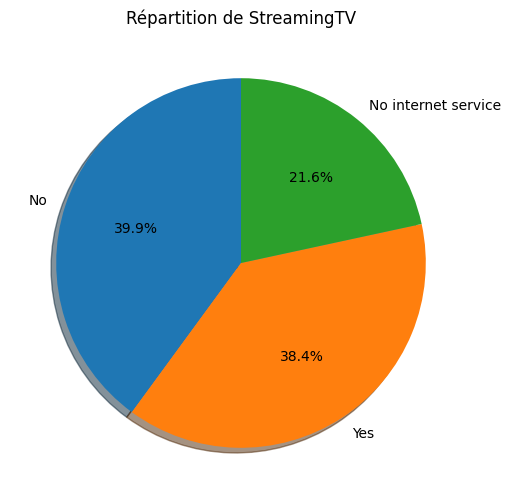

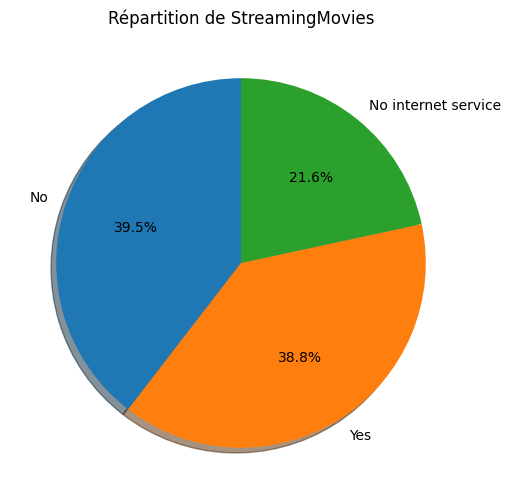

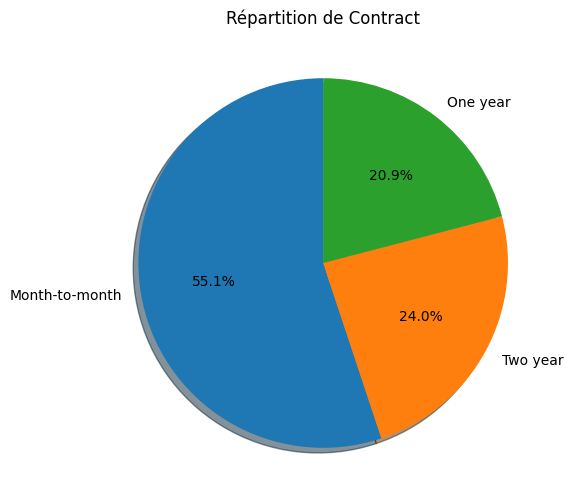

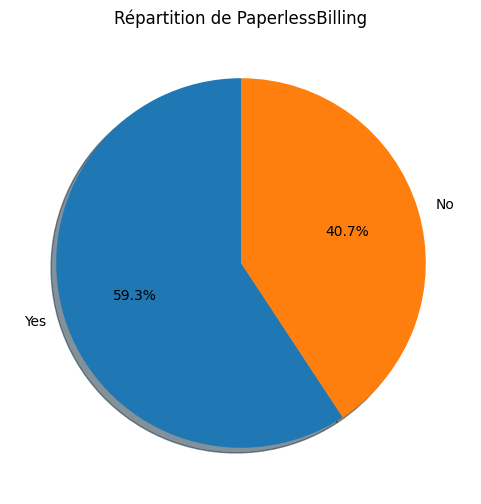

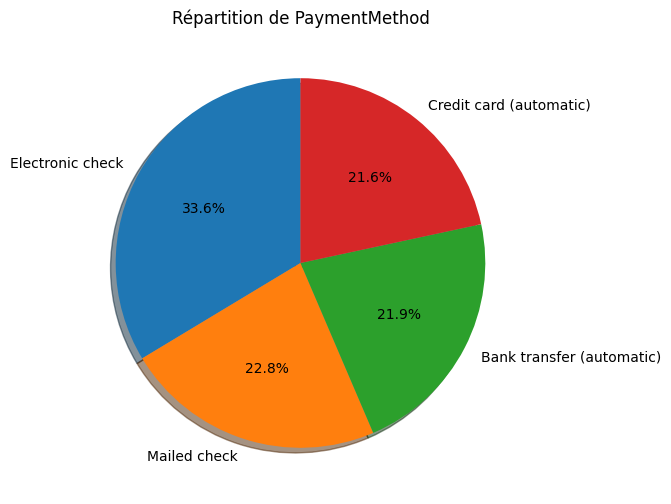

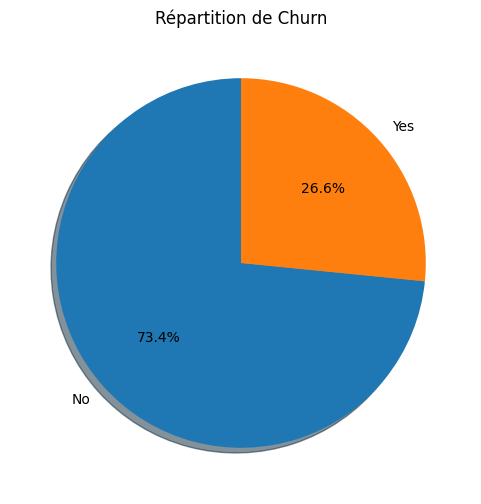

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title(f"Répartition de {col}")
    plt.ylabel('')
    plt.show()

# *Relation entre les variables*

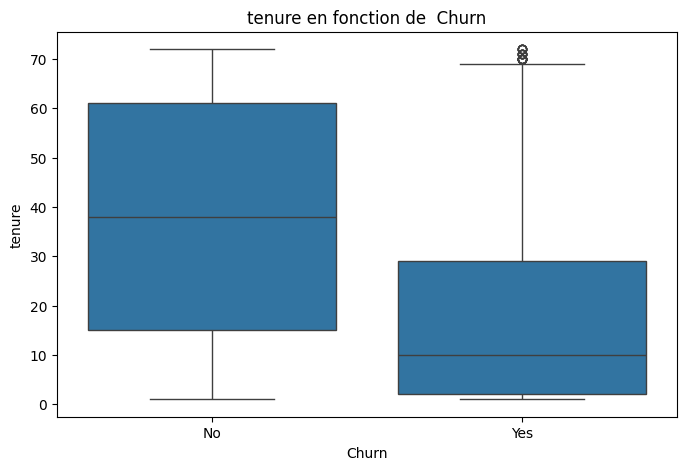

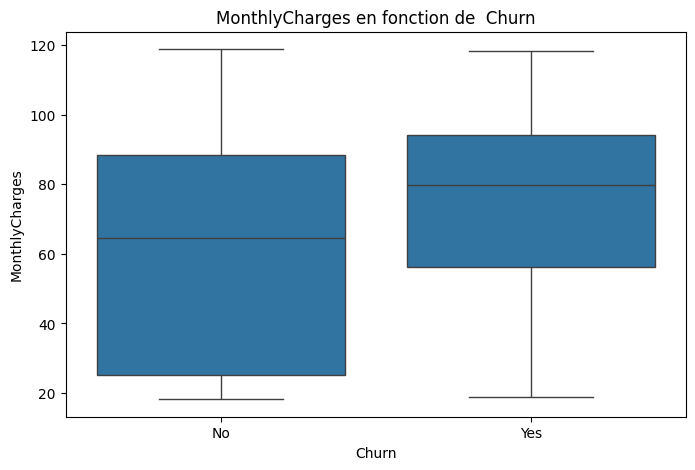

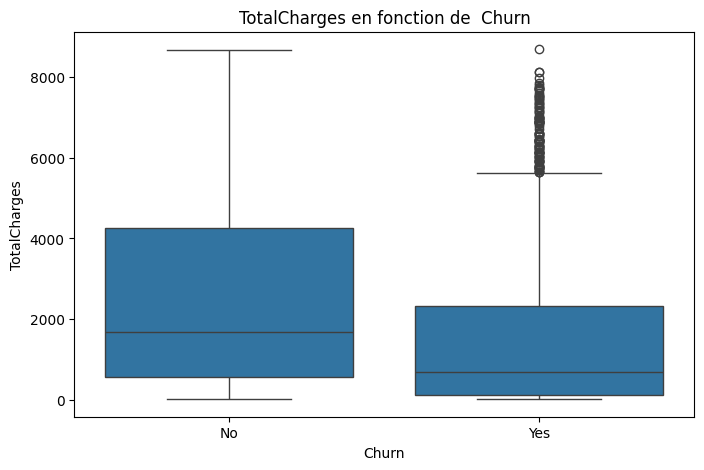

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} en fonction de  Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

les clients qui partent sont ceux qui ont fait le moins de temps, ils payent le plus par mois mais possedent une charge totale inferieure

Neamoins nou avons quelaue client qui ont une charge totale elevee mais finissent par quitter eux aussi


In [21]:
# Test de Kolmogorov-Smirnov et D'Agostino-Pearson pour chaque variable numérique
for col in numeric_cols:
    data = df[col].dropna()
    # Kolmogorov-Smirnov test (comparaison à la loi normale)
    ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))
    # D'Agostino-Pearson test
    dp_stat, dp_p = normaltest(data)
    print(f"{col}:")
    print(f"  Kolmogorov-Smirnov p-value: {ks_p:.4e}")
    print(f"  D'Agostino-Pearson p-value: {dp_p:.4e}")
    print("  Normale" if ks_p > 0.05 and dp_p > 0.05 else "  Non normale")
    print("-" * 40)

tenure:
  Kolmogorov-Smirnov p-value: 1.3329e-75
  D'Agostino-Pearson p-value: 0.0000e+00
  Non normale
----------------------------------------
MonthlyCharges:
  Kolmogorov-Smirnov p-value: 1.1257e-97
  D'Agostino-Pearson p-value: 0.0000e+00
  Non normale
----------------------------------------
TotalCharges:
  Kolmogorov-Smirnov p-value: 1.4678e-155
  D'Agostino-Pearson p-value: 9.6143e-176
  Non normale
----------------------------------------


Aucune de mes variables ne suivent une loi normale

In [22]:
from scipy.stats import mannwhitneyu

# Test de Mann-Whitney pour chaque variable numérique entre les groupes Churn
for col in numeric_cols:
    group_no = df[df['Churn'] == 'No'][col]
    group_yes = df[df['Churn'] == 'Yes'][col]
    stat, p = mannwhitneyu(group_no, group_yes, alternative='two-sided')
    print(f"{col}:")
    print(f"  Mann-Whitney U statistic: {stat:.2f}")
    print(f"  p-value: {p:.4e}")
    print("  Différence significative" if p < 0.05 else "  Pas de différence significative")
    print("-" * 40)

tenure:
  Mann-Whitney U statistic: 7154668.00
  p-value: 6.0430e-211
  Différence significative
----------------------------------------
MonthlyCharges:
  Mann-Whitney U statistic: 3663498.50
  p-value: 8.4672e-54
  Différence significative
----------------------------------------
TotalCharges:
  Mann-Whitney U statistic: 6288982.00
  p-value: 1.9960e-84
  Différence significative
----------------------------------------


il y'a une diferece significative entre ma variable cible churn et mes variables quanti

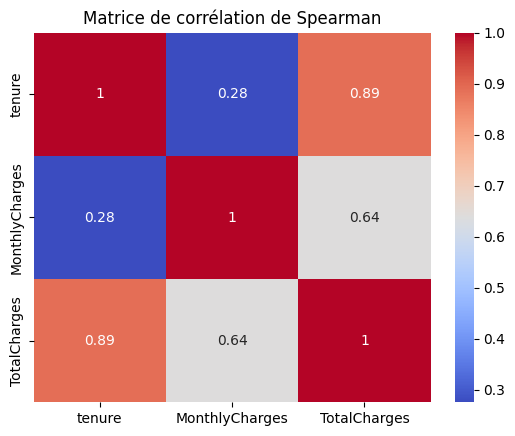

In [23]:
# Calcul de la matrice de corrélation de Spearman pour les variables numériques
spearman_corr = df[numeric_cols].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation de Spearman")
plt.show()

la variable tenure est fortement correle a TotalCharges 

ainsi que TotalCharges est moyennement correle a MonthlyCharges

In [24]:

X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


          Feature        VIF
0           const  14.973839
1          tenure   5.844646
2  MonthlyCharges   3.225293
3    TotalCharges   9.526697


la variable TotalCharges a un VIF de pratiquement 10 nous allons la retirer de notre jeu de donnees

nous allons creer en meme temps une nouvelle variable en fonction ce de la tenure

In [25]:
# Création d'une nouvelle variable catégorielle basée sur les quantiles de tenure
df['Groupe'] = pd.qcut(df['tenure'], q=3, labels=['court', 'moyen', 'long'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Groupe
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,court
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,moyen
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,court
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,moyen
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,court


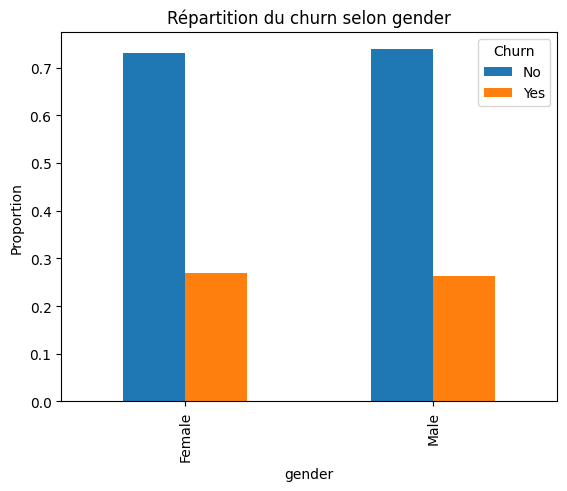

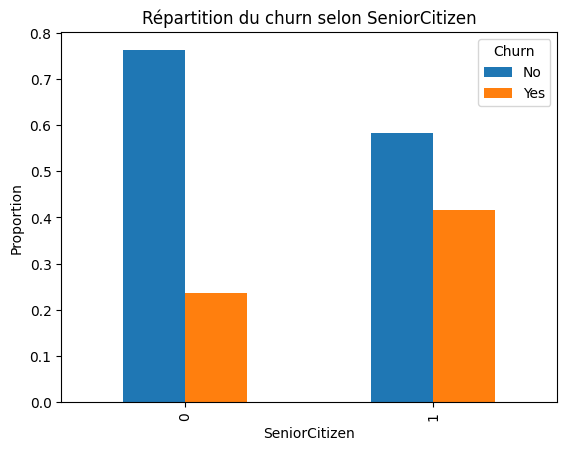

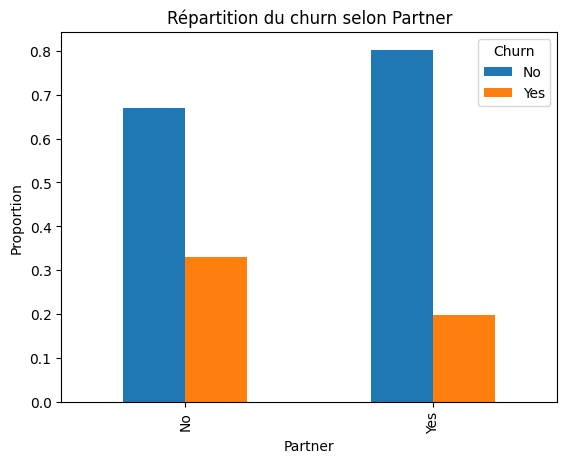

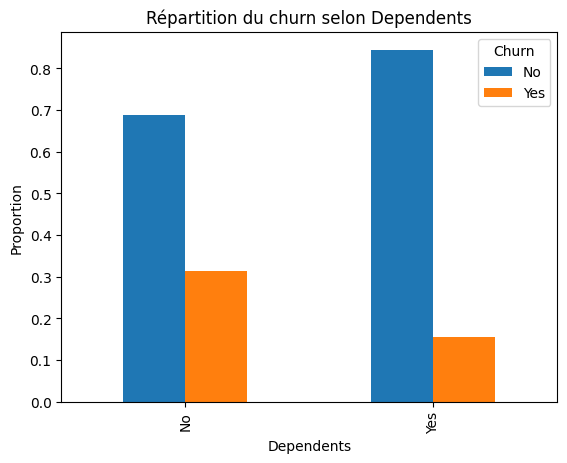

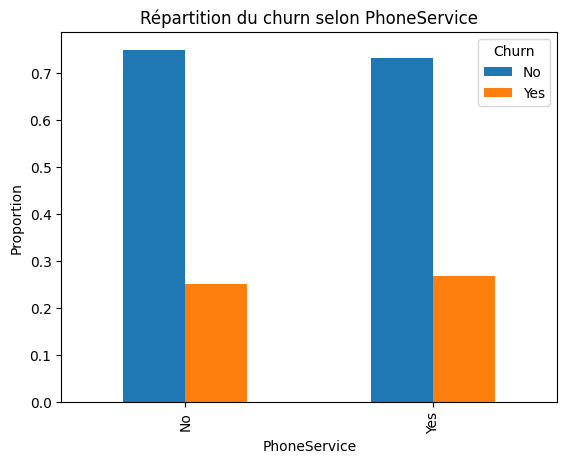

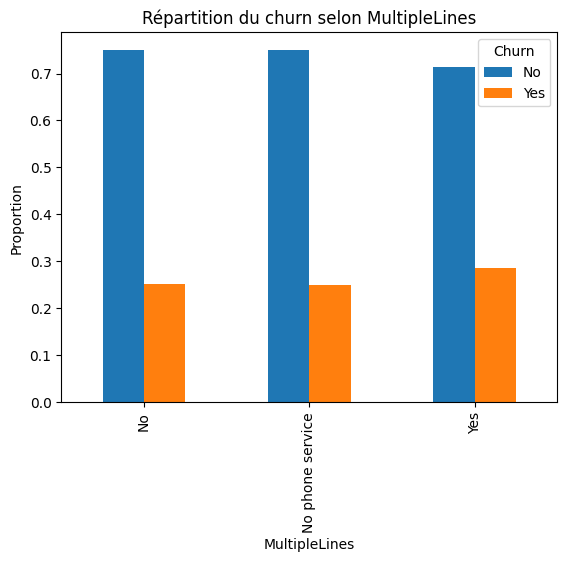

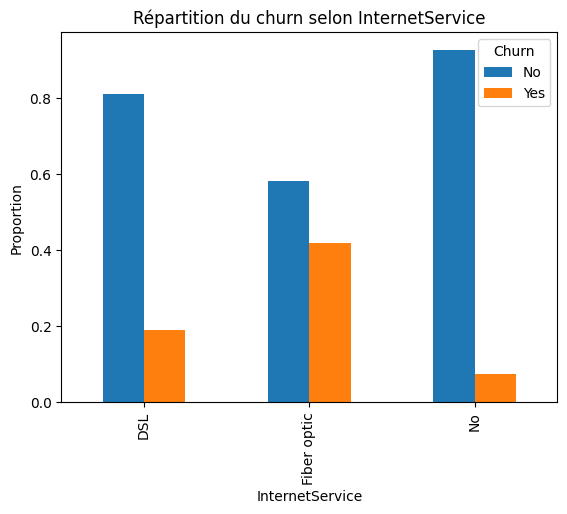

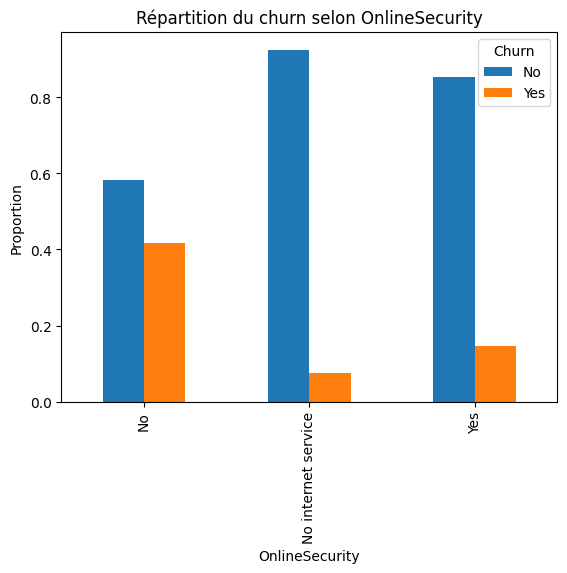

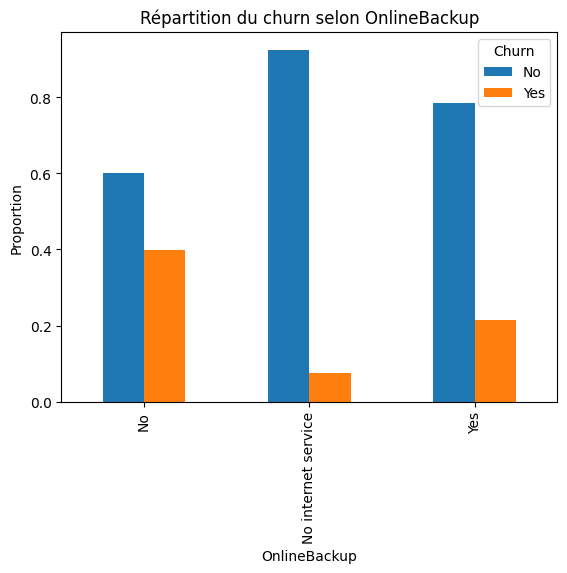

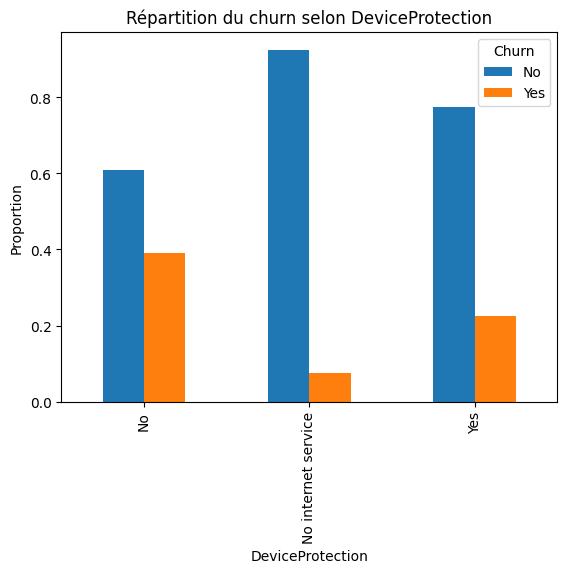

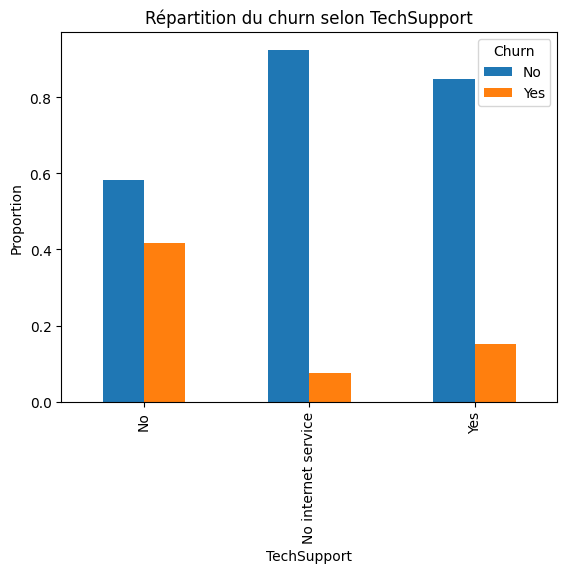

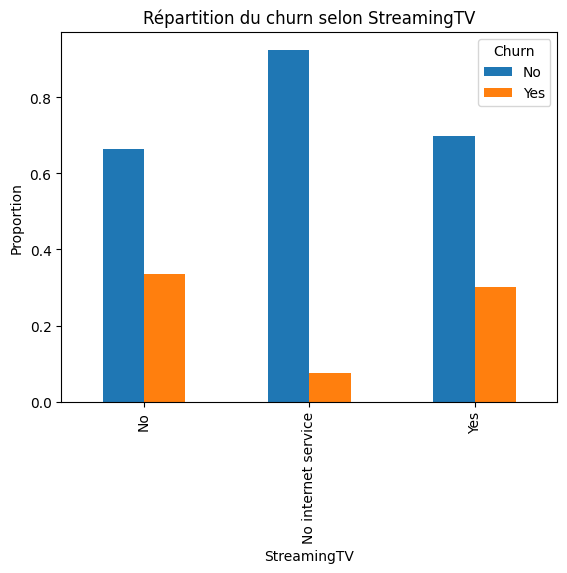

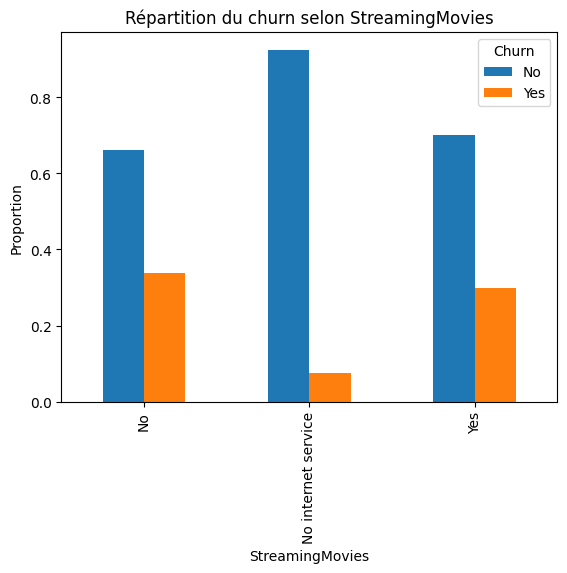

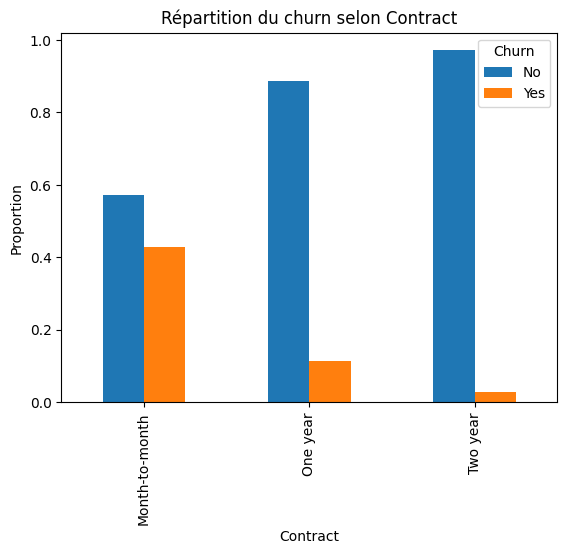

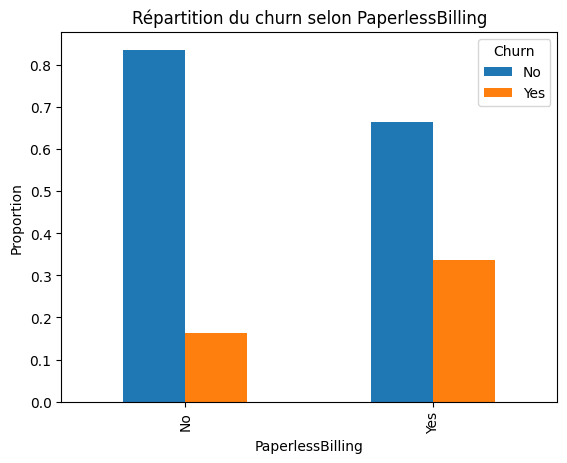

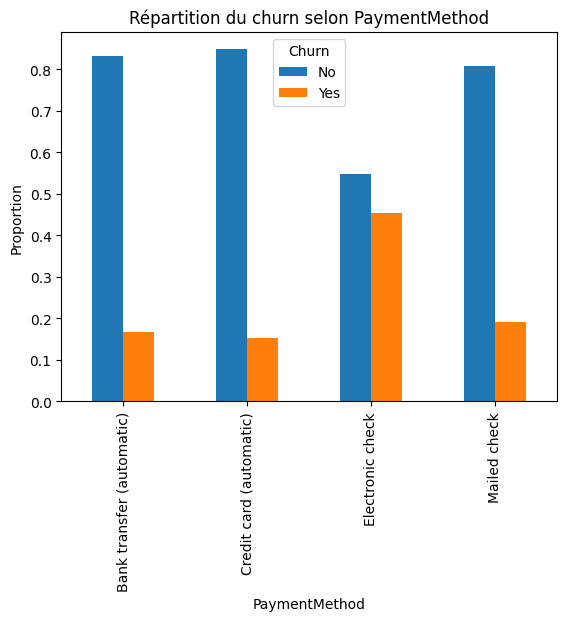

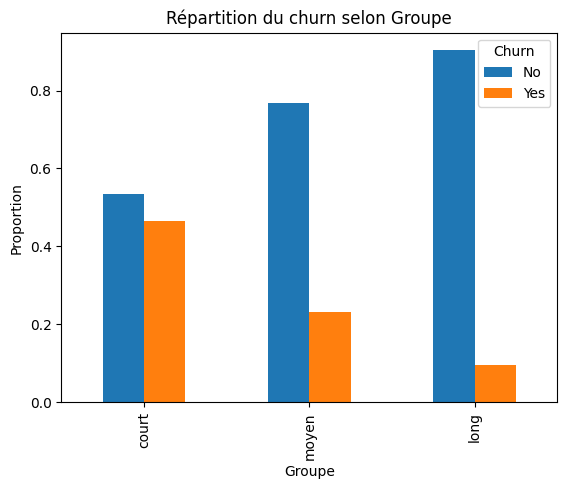

In [26]:
cat_cols2 = df.select_dtypes(['object','category']).columns.tolist()
for col in cat_cols2:
    if col != 'Churn':
        ct = pd.crosstab(df[col], df['Churn'], normalize='index')
        ct.plot(kind='bar', stacked=False)
        plt.title(f"Répartition du churn selon {col}")
        plt.xlabel(col)
        plt.ylabel("Proportion")
        plt.legend(title='Churn')
        plt.show()

les clients avec ces caracteristiques sont susceptibles de partir:

- paiement par cheque electronique
- avec une facturation sans papier
- ceux aui ont un contrat par mois 
- possedant une fibre optique
- les citoyens ages
- ceux qui viennent de s'inscrire


Donc nos bonnes variables sont : PaymentMethod, Paperlessbilling, contract, InternetService, SeniorCitizen,Groupe
le reste n'apporte pas d'information sur le depart d'un client

In [27]:
from scipy.stats import chi2_contingency
import numpy as np

# Variables à tester
vars_to_test = ['PaymentMethod', 'PaperlessBilling', 'Contract', 'InternetService', 'SeniorCitizen', 'Groupe']

cramers_v_results = {}

for var in vars_to_test:
    table = pd.crosstab(df[var], df['Churn'], normalize='index') * 100  # Convertir en pourcentage
    print(table)
    chi2, p, dof, expected = chi2_contingency(table)
    n = table.sum().sum()
    min_dim = min(table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else np.nan
    print(f"{var}:")
    print(f"  p-value: {p:.4e}")
    print(f"  Différence significative" if p < 0.05 else "  Pas de différence significative")
    print(f"  V de Cramer: {cramers_v:.3f}")
    print("-" * 40)
    cramers_v_results[var] = cramers_v

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995
PaymentMethod:
  p-value: 3.1006e-07
  Différence significative
  V de Cramer: 0.288
----------------------------------------
Churn                    No        Yes
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251
PaperlessBilling:
  p-value: 8.0902e-03
  Différence significative
  V de Cramer: 0.187
----------------------------------------
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665
Contract:
  p-value: 3.3005e-13
  Différence significative
  V de Cramer: 0.438
------------------------------------

les teests statistiques ont appuye nos decouvertes

regardons a present les autres variables qui n'apportaient pas d'information. peut-etre qu'ils n'apportent pas d'information en fonction du churn mais grace a une interaction avec une autre variable on peut decouvrir des informations cachees

In [28]:
varriables_exclure = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',]

In [29]:
from scipy.stats import chi2_contingency
import numpy as np

# Correction: use lowercase column names as in df.columns
for var in varriables_exclure:
    if var in df.columns:
        ct_percent = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
        print(f"Pourcentages pour {var} en fonction de Churn:")
        print(ct_percent)
        print("-" * 40)
        
        table = pd.crosstab(df[var], df['Churn'])
        chi2, p, dof, expected = chi2_contingency(table)
        n = table.sum().sum()
        min_dim = min(table.shape) - 1
        cramers_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else np.nan
        print(f"Test du chi2 pour {var}: p-value = {p:.4e}")
        print("Association significative" if p < 0.05 else "Pas d'association significative")
        print(f"V de Cramer: {cramers_v:.3f}")
        print("=" * 60)
    else:
        print(f"Colonne '{var}' non trouvée dans df.columns")

Pourcentages pour gender en fonction de Churn:
Churn          No        Yes
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565
----------------------------------------
Test du chi2 pour gender: p-value = 4.9049e-01
Pas d'association significative
V de Cramer: 0.008
Pourcentages pour Partner en fonction de Churn:
Churn           No        Yes
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065
----------------------------------------
Test du chi2 pour Partner: p-value = 3.9738e-36
Association significative
V de Cramer: 0.150
Pourcentages pour Dependents en fonction de Churn:
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205
----------------------------------------
Test du chi2 pour Dependents: p-value = 2.0197e-42
Association significative
V de Cramer: 0.163
Pourcentages pour PhoneService en fonction de Churn:
Churn                No

Nous faisons une grande decouverte certaines variables dont nous avons dit n'apportant pas d'information apporte reellement de l'information dorenaant je dois faire des tableaux croises graphiquement ca se voit pas 

j'ai exclu le genre et PhoneService parceque ils n'apportaient pas reellement de l'info par rapport au churn et aussi MultiplesService certe il y'avait une difference significative mais la force etait trop faible < 0.1

In [30]:
conserver =['StreamingMovies', 'StreamingTV', 'OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport','Dependents','Partner']

In [31]:
# Fusionner les listes de variables à conserver, à exclure et les variables numériques, et ajouter 'Churn'
selected_vars = list(set(conserver + vars_to_test + numeric_cols + ['Churn']))
data = df[selected_vars]
data.head()

,Churn,StreamingTV,PaperlessBilling,tenure,Contract,MonthlyCharges,Dependents,TotalCharges,Partner,InternetService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,SeniorCitizen,PaymentMethod,Groupe,StreamingMovies
0,No,No,Yes,1,Month-to-month,29.85,No,29.85,Yes,DSL,No,No,Yes,No,0,Electronic check,court,No
1,No,No,No,34,One year,56.95,No,1889.50,No,DSL,Yes,Yes,No,No,0,Mailed check,moyen,No
2,Yes,No,Yes,2,Month-to-month,53.85,No,108.15,No,DSL,No,Yes,Yes,No,0,Mailed check,court,No
3,No,No,No,45,One year,42.30,No,1840.75,No,DSL,Yes,Yes,No,Yes,0,Bank transfer (automatic),moyen,No
4,Yes,No,Yes,2,Month-to-month,70.70,No,151.65,No,Fiber optic,No,No,No,No,0,Electronic check,court,No


In [32]:
data = data.drop(columns=['tenure','TotalCharges'])
data.shape

(7032, 16)

In [33]:
data.head()

,Churn,StreamingTV,PaperlessBilling,Contract,MonthlyCharges,Dependents,Partner,InternetService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,SeniorCitizen,PaymentMethod,Groupe,StreamingMovies
0,No,No,Yes,Month-to-month,29.85,No,Yes,DSL,No,No,Yes,No,0,Electronic check,court,No
1,No,No,No,One year,56.95,No,No,DSL,Yes,Yes,No,No,0,Mailed check,moyen,No
2,Yes,No,Yes,Month-to-month,53.85,No,No,DSL,No,Yes,Yes,No,0,Mailed check,court,No
3,No,No,No,One year,42.30,No,No,DSL,Yes,Yes,No,Yes,0,Bank transfer (automatic),moyen,No
4,Yes,No,Yes,Month-to-month,70.70,No,No,Fiber optic,No,No,No,No,0,Electronic check,court,No


# PreProcessing

In [34]:
col = data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in col:
    print(f'{col} : {data[col].unique()}')

Churn : ['No' 'Yes']
StreamingTV : ['No' 'Yes' 'No internet service']
PaperlessBilling : ['Yes' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
Dependents : ['No' 'Yes']
Partner : ['Yes' 'No']
InternetService : ['DSL' 'Fiber optic' 'No']
DeviceProtection : ['No' 'Yes' 'No internet service']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
SeniorCitizen : [0, 1]
Categories (2, int64): [0, 1]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Groupe : ['court', 'moyen', 'long']
Categories (3, object): ['court' < 'moyen' < 'long']
StreamingMovies : ['No' 'Yes' 'No internet service']


In [35]:
data['PaymentMethod'] = np.where(
    data['PaymentMethod'].str.contains('Electronic check', case=False, regex=False),
    'Electronic check',
    'Autre'
)


In [36]:
data['Contract'] = np.where(
    data['Contract'].str.contains('Month-to-month', case=False, regex=False),
    'Month-to-month',
    'Year'
)

data['Contract'] = np.where(
    data['Contract'].str.contains('Year', case=False, regex=False),
    'Year',
    'Month'
)
data.head()

,Churn,StreamingTV,PaperlessBilling,Contract,MonthlyCharges,Dependents,Partner,InternetService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,SeniorCitizen,PaymentMethod,Groupe,StreamingMovies
0,No,No,Yes,Month,29.85,No,Yes,DSL,No,No,Yes,No,0,Electronic check,court,No
1,No,No,No,Year,56.95,No,No,DSL,Yes,Yes,No,No,0,Autre,moyen,No
2,Yes,No,Yes,Month,53.85,No,No,DSL,No,Yes,Yes,No,0,Autre,court,No
3,No,No,No,Year,42.30,No,No,DSL,Yes,Yes,No,Yes,0,Autre,moyen,No
4,Yes,No,Yes,Month,70.70,No,No,Fiber optic,No,No,No,No,0,Electronic check,court,No


nous allons faire un encodage manuel de nos variables

In [37]:
# Encodage manuel selon les règles spécifiées
mapping_dict = {
    'YesNo': {'Yes': 1, 'No': 0},
    'YesNoNoInternet': {'Yes': 1, 'No': 2, 'No internet service': 0},
    'Groupe': {'court': 1, 'moyen': 2, 'long': 3},
    'PaymentMethod': {'Electronic check': 1, 'Autre': 0},
    'Contract': {'Month': 1, 'Year': 0}
}

# Colonnes à encoder
yes_no_cols = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']
yes_no_no_internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
groupe_col = ['Groupe']
payment_method_col = ['PaymentMethod']
contract_col = ['Contract']

# Nettoyage préventif
cols_to_clean = yes_no_cols + yes_no_no_internet_cols + groupe_col + payment_method_col + contract_col
for col in cols_to_clean:
    if col in data.columns:
        data[col] = data[col].astype(str).str.strip()

# Encodage avec gestion des valeurs non mappées
for col in yes_no_cols:
    if col in data.columns:
        data[col] = data[col].map(mapping_dict['YesNo'])

for col in yes_no_no_internet_cols:
    if col in data.columns:
        data[col] = data[col].map(mapping_dict['YesNoNoInternet'])

for col in groupe_col:
    if col in data.columns:
        data[col] = data[col].map(mapping_dict['Groupe'])

for col in payment_method_col:
    if col in data.columns:
        data[col] = data[col].map(mapping_dict['PaymentMethod'])

for col in contract_col:
    if col in data.columns:
        data[col] = data[col].map(mapping_dict['Contract'])
data.head()

,Churn,StreamingTV,PaperlessBilling,Contract,MonthlyCharges,Dependents,Partner,InternetService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,SeniorCitizen,PaymentMethod,Groupe,StreamingMovies
0,0,2,1,1,29.85,0,1,DSL,2,2,1,2,0,1,1,2
1,0,2,0,0,56.95,0,0,DSL,1,1,2,2,0,0,2,2
2,1,2,1,1,53.85,0,0,DSL,2,1,1,2,0,0,1,2
3,0,2,0,0,42.30,0,0,DSL,1,1,2,1,0,0,2,2
4,1,2,1,1,70.70,0,0,Fiber optic,2,2,2,2,0,1,1,2


In [38]:
from sklearn.preprocessing import OneHotEncoder
# 2. Vérification des catégories
print("Valeurs uniques:", data['InternetService'].unique())

# 3. Encodage avec contrôle qualité
encoder = OneHotEncoder(
    categories=[['No','Fiber optic', 'DSL']],
    drop='first',
    sparse_output=False,
    dtype=np.int8,
    handle_unknown='ignore'  # Sécurité supplémentaire
)

# 4. Transformation en garantissant l'alignement
encoded_data = encoder.fit_transform(data[['InternetService']])
encoded_df = pd.DataFrame(
    encoded_data,
    columns=[f"Internet_{cat}" for cat in encoder.categories_[0][1:]],
    index=data.index  # ← Critical: conserve les mêmes index
)

# 5. Concaténation propre
data = pd.concat([data, encoded_df], axis=1)
data = data.drop(columns=["InternetService"])
data

Valeurs uniques: ['DSL' 'Fiber optic' 'No']


,Churn,StreamingTV,PaperlessBilling,Contract,MonthlyCharges,Dependents,Partner,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,SeniorCitizen,PaymentMethod,Groupe,StreamingMovies,Internet_Fiber optic,Internet_DSL
0,0,2,1,1,29.85,0,1,2,2,1,2,0,1,1,2,0,1
1,0,2,0,0,56.95,0,0,1,1,2,2,0,0,2,2,0,1
2,1,2,1,1,53.85,0,0,2,1,1,2,0,0,1,2,0,1
3,0,2,0,0,42.30,0,0,1,1,2,1,0,0,2,2,0,1
4,1,2,1,1,70.70,0,0,2,2,2,2,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,84.80,1,1,1,1,2,1,0,0,2,1,0,1
7039,0,1,1,0,103.20,1,1,1,2,1,2,0,0,3,1,1,0
7040,0,2,1,1,29.60,1,1,2,1,2,2,0,1,1,2,0,1
7041,1,2,1,1,74.40,0,1,2,2,2,2,1,0,1,2,1,0


# Feature Selection

In [39]:
def fit_model(X, Y):
    
    '''Use a RandomForestClassifier for this problem.'''
    
    # define the model to use
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Train the model
    model.fit(X, Y)
    
    return model

def calculate_metrics(model, X_test_scaled, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_predict_r = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics for assesing performance of the model.
    rec = recall_score(Y_test, y_predict_r)

    roc = average_precision_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    acc = accuracy_score(Y_test, y_predict_r)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_predict_r).ravel()
    # Calcul du FPR
    spe = fp / (fp + tn)
    
    return (rec,f1,roc,spe,acc,y_predict_r)

def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train_scaled, Y_train)

    # Make predictions on test dataset and calculate metrics.
    rec,f1,roc,spe,acc,y_predict_r = calculate_metrics(model, X_test_scaled, Y_test)

    return rec,f1,roc,spe,acc,y_predict_r

def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    rec,f1,roc,spe,acc,y_predict_r = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[rec,f1,roc,spe,acc, X.shape[1]]], columns=["Recall","F1 Score","AUC-PR","Specificite","Accuracy",'Feature Count'])
    
    return display_df,y_predict_r

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des features et target
X = data.drop(columns=["Churn"])
y = data["Churn"]

# 1. Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Utilisez X déjà défini plutôt que data.drop()
    y,
    test_size=0.2,
    random_state=42
)

# 2. Initialisation des DataFrames pour les données standardisées
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# 3. Standardisation UNIQUEMENT de "MonthlyCharges"
scaler = StandardScaler()
X_train_scaled["MonthlyCharges"] = scaler.fit_transform(X_train[["MonthlyCharges"]])  # Notez les doubles crochets
X_test_scaled["MonthlyCharges"] = scaler.transform(X_test[["MonthlyCharges"]])        # transform() seulement

In [41]:
# Calculate evaluation metrics
all_features_eval_data = evaluate_model_on_features(X, y)[0]
all_features_eval_data.index = ['All features']

# Initialize results dataframe
results = all_features_eval_data

# Check the metrics
results.head()

,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.14424,0.754087,16


In [42]:
def univariate_selection(taille):
    
    # Split train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X,  # Utilisez X déjà défini plutôt que data.drop()
        y,
        test_size=0.3,
    )
    
    # 2. Initialisation des DataFrames pour les données standardisées
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    # 3. Standardisation UNIQUEMENT de "MonthlyCharges"
    scaler = StandardScaler()
    X_train_scaled["MonthlyCharges"] = scaler.fit_transform(X_train[["MonthlyCharges"]])  # Notez les doubles crochets
    X_test_scaled["MonthlyCharges"] = scaler.transform(X_test[["MonthlyCharges"]])  
    # User SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=taille)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(data.drop("Churn",axis=1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = data.drop("Churn",axis=1 ).columns[feature_idx]
    
    return feature_names

In [43]:
univariate_feature_names1 = univariate_selection(10)
univariate_feature_names1

StreamingTV: True
PaperlessBilling: False
Contract: True
MonthlyCharges: False
Dependents: False
Partner: False
DeviceProtection: True
OnlineSecurity: True
OnlineBackup: True
TechSupport: True
SeniorCitizen: False
PaymentMethod: True
Groupe: True
StreamingMovies: True
Internet_Fiber optic: True
Internet_DSL: False


Index(['StreamingTV', 'Contract', 'DeviceProtection', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'PaymentMethod', 'Groupe',
       'StreamingMovies', 'Internet_Fiber optic'],
      dtype='object')

In [44]:
# Calculate and check model metrics
univariate_eval_data = evaluate_model_on_features(X[univariate_feature_names1], y)[0]
univariate_eval_data.index = ['K-best(10)']

# Append to results and display
 
results = pd.concat([results,univariate_eval_data], ignore_index=False)
results.head()

,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10


In [45]:
univariate_feature_names2 = univariate_selection(8)
univariate_feature_names2

StreamingTV: False
PaperlessBilling: False
Contract: True
MonthlyCharges: False
Dependents: False
Partner: False
DeviceProtection: True
OnlineSecurity: True
OnlineBackup: True
TechSupport: True
SeniorCitizen: False
PaymentMethod: True
Groupe: True
StreamingMovies: False
Internet_Fiber optic: True
Internet_DSL: False


Index(['Contract', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'PaymentMethod', 'Groupe', 'Internet_Fiber optic'],
      dtype='object')

In [46]:
# Calculate and check model metrics
univariate_eval_data = evaluate_model_on_features(X[univariate_feature_names2], y)[0]
univariate_eval_data.index = ['K-best(8)']

# Append to results and display
 
results = pd.concat([results,univariate_eval_data], ignore_index=False)
results.head()

,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10
K-best(8),0.545455,0.566667,0.442422,0.137464,0.778252,8


In [47]:
univariate_feature_names3 = univariate_selection(6)
univariate_feature_names3

StreamingTV: False
PaperlessBilling: False
Contract: True
MonthlyCharges: False
Dependents: False
Partner: False
DeviceProtection: False
OnlineSecurity: True
OnlineBackup: False
TechSupport: True
SeniorCitizen: False
PaymentMethod: True
Groupe: True
StreamingMovies: False
Internet_Fiber optic: True
Internet_DSL: False


Index(['Contract', 'OnlineSecurity', 'TechSupport', 'PaymentMethod', 'Groupe',
       'Internet_Fiber optic'],
      dtype='object')

In [48]:
# Calculate and check model metrics
univariate_eval_data = evaluate_model_on_features(X[univariate_feature_names3], y)[0]
univariate_eval_data.index = ['K-best(6)']

# Append to results and display
 
results = pd.concat([results,univariate_eval_data], ignore_index=False)
results.head()

,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10
K-best(8),0.545455,0.566667,0.442422,0.137464,0.778252,8
K-best(6),0.561497,0.584145,0.458341,0.130687,0.787491,6


In [49]:
univariate_feature_names4 = univariate_selection(5)
univariate_feature_names4

StreamingTV: False
PaperlessBilling: False
Contract: True
MonthlyCharges: False
Dependents: False
Partner: False
DeviceProtection: False
OnlineSecurity: True
OnlineBackup: False
TechSupport: True
SeniorCitizen: False
PaymentMethod: True
Groupe: True
StreamingMovies: False
Internet_Fiber optic: False
Internet_DSL: False


Index(['Contract', 'OnlineSecurity', 'TechSupport', 'PaymentMethod', 'Groupe'], dtype='object')

In [50]:
# Calculate and check model metrics
univariate_eval_data = evaluate_model_on_features(X[univariate_feature_names4], y)[0]
univariate_eval_data.index = ['K-best(5)']

# Append to results and display
 
results = pd.concat([results,univariate_eval_data], ignore_index=False)
results.head()

,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10
K-best(8),0.545455,0.566667,0.442422,0.137464,0.778252,8
K-best(6),0.561497,0.584145,0.458341,0.130687,0.787491,6
K-best(5),0.542781,0.578348,0.457464,0.121007,0.789623,5


In [51]:
def run_rfe(taille):
    
    # Split train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X,  # Utilisez X déjà défini plutôt que data.drop()
        y,
        test_size=0.25,
    )
    
    # 2. Initialisation des DataFrames pour les données standardisées
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    # 3. Standardisation UNIQUEMENT de "MonthlyCharges"
    scaler = StandardScaler()
    X_train_scaled["MonthlyCharges"] = scaler.fit_transform(X_train[["MonthlyCharges"]])  # Notez les doubles crochets
    X_test_scaled["MonthlyCharges"] = scaler.transform(X_test[["MonthlyCharges"]])  

    # Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Wrap RFE around the model
    rfe = RFE(model, n_features_to_select=taille)
    
    # Fit RFE
    rfe = rfe.fit(X_train_scaled, y_train)
    feature_names = data.drop("Churn",axis=1 ).columns[rfe.get_support()]
    
    return feature_names

In [52]:
rfe_feature_names1 = run_rfe(6)

# les 6 choix des forets
print(rfe_feature_names1)

# Calculate and check model metrics
rfe_eval_data = evaluate_model_on_features(X[rfe_feature_names1], y)[0]
rfe_eval_data.index = ['RFE (6)']

# Append to results and display
 
results = pd.concat([results, rfe_eval_data], ignore_index=False)
results


Index(['Contract', 'MonthlyCharges', 'OnlineSecurity', 'TechSupport', 'Groupe',
       'Internet_Fiber optic'],
      dtype='object')


,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10
K-best(8),0.545455,0.566667,0.442422,0.137464,0.778252,8
K-best(6),0.561497,0.584145,0.458341,0.130687,0.787491,6
K-best(5),0.542781,0.578348,0.457464,0.121007,0.789623,5
RFE (6),0.454545,0.461330,0.357862,0.186834,0.717839,6


In [53]:
rfe_feature_names1 = run_rfe(10)

# les 6 choix des forets
print(rfe_feature_names1)

# Calculate and check model metrics
rfe_eval_data = evaluate_model_on_features(X[rfe_feature_names1], y)[0]
rfe_eval_data.index = ['RFE (10)']

# Append to results and display
 
results = pd.concat([results, rfe_eval_data], ignore_index=False)
results


Index(['Contract', 'MonthlyCharges', 'Partner', 'DeviceProtection',
       'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'PaymentMethod',
       'Groupe', 'Internet_Fiber optic'],
      dtype='object')


,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10
K-best(8),0.545455,0.566667,0.442422,0.137464,0.778252,8
K-best(6),0.561497,0.584145,0.458341,0.130687,0.787491,6
K-best(5),0.542781,0.578348,0.457464,0.121007,0.789623,5
RFE (6),0.454545,0.461330,0.357862,0.186834,0.717839,6
RFE (10),0.441176,0.473458,0.373912,0.152953,0.739161,10


In [54]:
rfe_feature_names1 = run_rfe(14)

# les 6 choix des forets
print(rfe_feature_names1)

# Calculate and check model metrics
rfe_eval_data = evaluate_model_on_features(X[rfe_feature_names1], y)[0]
rfe_eval_data.index = ['RFE (14)']

# Append to results and display
 
results = pd.concat([results, rfe_eval_data], ignore_index=False)
results


Index(['StreamingTV', 'PaperlessBilling', 'Contract', 'MonthlyCharges',
       'Dependents', 'Partner', 'DeviceProtection', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'PaymentMethod', 'Groupe',
       'StreamingMovies', 'Internet_Fiber optic'],
      dtype='object')


,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10
K-best(8),0.545455,0.566667,0.442422,0.137464,0.778252,8
K-best(6),0.561497,0.584145,0.458341,0.130687,0.787491,6
K-best(5),0.542781,0.578348,0.457464,0.121007,0.789623,5
RFE (6),0.454545,0.461330,0.357862,0.186834,0.717839,6
RFE (10),0.441176,0.473458,0.373912,0.152953,0.739161,10
RFE (14),0.467914,0.499287,0.391849,0.147144,0.750533,14


In [55]:
rfe_feature_names1 = run_rfe(5)

# les 6 choix des forets
print(rfe_feature_names1)

# Calculate and check model metrics
rfe_eval_data = evaluate_model_on_features(X[rfe_feature_names1], y)[0]
rfe_eval_data.index = ['RFE (5)']

# Append to results and display
 
results = pd.concat([results, rfe_eval_data], ignore_index=False)
results


Index(['Contract', 'MonthlyCharges', 'OnlineSecurity', 'TechSupport',
       'Groupe'],
      dtype='object')


,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10
K-best(8),0.545455,0.566667,0.442422,0.137464,0.778252,8
K-best(6),0.561497,0.584145,0.458341,0.130687,0.787491,6
K-best(5),0.542781,0.578348,0.457464,0.121007,0.789623,5
RFE (6),0.454545,0.461330,0.357862,0.186834,0.717839,6
RFE (10),0.441176,0.473458,0.373912,0.152953,0.739161,10
RFE (14),0.467914,0.499287,0.391849,0.147144,0.750533,14
RFE (5),0.459893,0.463612,0.358518,0.189739,0.717129,5


In [56]:
def feature_importances_from_tree_based_model_():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 123)
    
    # Define the model to use
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier()
    model = model.fit(X_train_scaled,Y_train)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model, X):
    selector = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = selector.get_support()
    feature_names = X.columns[feature_idx]
    return feature_names



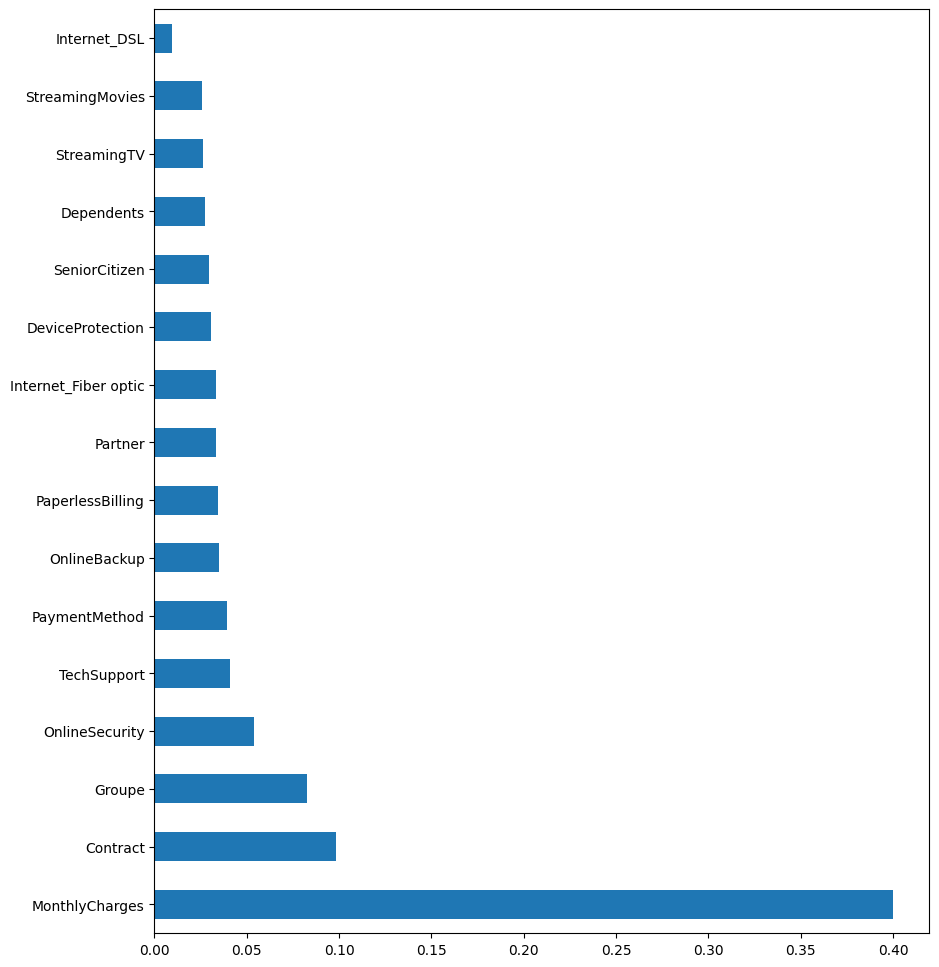

In [57]:

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model, X)


In [58]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(X[feature_imp_feature_names], y)[0]
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display

results = pd.concat([results, feat_imp_eval_df], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy,Feature Count
All features,0.473262,0.505714,0.396969,0.144240,0.754087,16
K-best(10),0.540107,0.554184,0.429574,0.148112,0.769012,10
K-best(8),0.545455,0.566667,0.442422,0.137464,0.778252,8
K-best(6),0.561497,0.584145,0.458341,0.130687,0.787491,6
K-best(5),0.542781,0.578348,0.457464,0.121007,0.789623,5
RFE (6),0.454545,0.461330,0.357862,0.186834,0.717839,6
RFE (10),0.441176,0.473458,0.373912,0.152953,0.739161,10
RFE (14),0.467914,0.499287,0.391849,0.147144,0.750533,14
RFE (5),0.459893,0.463612,0.358518,0.189739,0.717129,5
Feature Importance,0.457219,0.494935,0.390917,0.141336,0.751955,15


Nous allons partir sur le k-best(6)
['Contract', 'Groupe', 'OnlineSecurity', 'TechSupport',
       'Internet_Fiber optic']

# Selection de Modele

In [59]:
X = X[['Contract', 'Groupe', 'OnlineSecurity', 'TechSupport', 'OnlineBackup',
       'Internet_Fiber optic']]
X

,Contract,Groupe,OnlineSecurity,TechSupport,OnlineBackup,Internet_Fiber optic
0,1,1,2,2,1,0
1,0,2,1,2,2,0
2,1,1,1,2,1,0
3,0,2,1,1,2,0
4,1,1,2,2,2,1
...,...,...,...,...,...,...
7038,0,2,1,1,2,0
7039,0,3,2,2,1,1
7040,1,1,1,2,2,0
7041,1,1,2,2,2,1


In [60]:
# 1. Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Utilisez X déjà défini plutôt que data.drop()
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 2. Initialisation des DataFrames pour les données standardisées
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [61]:
y_test.value_counts()

Churn
0    1033
1     374
Name: count, dtype: int64

In [62]:
X_train_scaled.head()

,Contract,Groupe,OnlineSecurity,TechSupport,OnlineBackup,Internet_Fiber optic
1413,0,3,1,1,1,1
7003,1,2,2,1,2,0
3355,0,3,2,1,1,1
4494,1,1,2,2,1,1
3541,1,3,1,2,2,0


In [63]:
def concat(y_predict_r):
    # Calculate evaluation metrics for assesing performance of the model.
    rec = recall_score(y_test, y_predict_r)

    roc = average_precision_score(y_test, y_predict_r)
    f1 = f1_score(y_test, y_predict_r)
    acc = accuracy_score(y_test, y_predict_r)

    tn, fp, fn, tp = confusion_matrix(y_test, y_predict_r).ravel()
    # Calcul du FPR
    spe = fp / (fp + tn)
    
    # Construct a dataframe to display metrics.
    display_data = pd.DataFrame([[rec,f1,roc,spe,acc]], columns=["Recall","F1 Score","AUC-PR","Specificite","Accuracy"])
    return display_data

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Initialisation avec k=10
knn = KNeighborsClassifier(n_neighbors=10)
# Entraînement
knn.fit(X_train_scaled, y_train)



# Prédictions
y_predict_r = knn.predict(X_test_scaled)

score = concat(y_predict_r)
score.index = ['K-NN (10)']

#initialisation
results = score
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723


In [65]:
# Optimisation
from sklearn.model_selection import GridSearchCV

# Définition des valeurs de k à tester
param_grid = {'n_neighbors': range(1, 20)}

# Recherche par validation croisée
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Meilleur k
print("Meilleur k:", grid_search.best_params_['n_neighbors'])

# Ré-entraînement avec le meilleur k
best_knn = grid_search.best_estimator_

Meilleur k: 19


In [66]:
# Prédictions avec le modèle optimisé
y_predict_r = best_knn.predict(X_test_scaled)

score = concat(y_predict_r)
score.index = ['K-NN best']

results = pd.concat([results, score], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723
K-NN best,0.449198,0.516129,0.418848,0.105518,0.776119


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialisation
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entraînement (pas besoin de standardiser les données pour les Random Forests)
rf.fit(X_train, y_train)

# Prédiction et évaluation
y_predict_r = rf.predict(X_test)

score = concat(y_predict_r)
score.index = ['RandomForest-100']

results = pd.concat([results, score], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723
K-NN best,0.449198,0.516129,0.418848,0.105518,0.776119
RandomForest-100,0.770053,0.621359,0.462163,0.256534,0.750533


In [68]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall')  # cv=5 (cross-validation)
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres:", grid_search.best_params_)

Meilleurs hyperparamètres: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


In [69]:
best_rf = grid_search.best_estimator_
y_proba = best_rf.predict_proba(X_test)[:, 1]
y_predict_r = (y_proba > 0.27).astype(int)

score = concat(y_predict_r)
score.index = ['RandomForest-best(0.27)']

results = pd.concat([results, score], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723
K-NN best,0.449198,0.516129,0.418848,0.105518,0.776119
RandomForest-100,0.770053,0.621359,0.462163,0.256534,0.750533
RandomForest-best(0.27),0.919786,0.556184,0.387957,0.502420,0.609808


In [70]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe 1
y_predict_r = (y_proba > 0.3).astype(int)  # Seuil à 0.3 au lieu de 0.5

score = concat(y_predict_r)
score.index = ['R-Logistique 0.3']

results = pd.concat([results, score], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723
K-NN best,0.449198,0.516129,0.418848,0.105518,0.776119
RandomForest-100,0.770053,0.621359,0.462163,0.256534,0.750533
RandomForest-best(0.27),0.919786,0.556184,0.387957,0.502420,0.609808
R-Logistique 0.3,0.919786,0.567189,0.398445,0.479187,0.626866


In [71]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe 1
y_predict_r = (y_proba > 0.5).astype(int)  # Seuil à 0.3 au lieu de 0.5

score = concat(y_predict_r)
score.index = ['R-Logistique 0.5']

results = pd.concat([results, score], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723
K-NN best,0.449198,0.516129,0.418848,0.105518,0.776119
RandomForest-100,0.770053,0.621359,0.462163,0.256534,0.750533
RandomForest-best(0.27),0.919786,0.556184,0.387957,0.502420,0.609808
R-Logistique 0.3,0.919786,0.567189,0.398445,0.479187,0.626866
R-Logistique 0.5,0.786096,0.600000,0.438232,0.302033,0.721393


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Définir les hyperparamètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Force de régularisation (inverse de alpha)
    'penalty': ['l1', 'l2'],    # Type de pénalisation
    'solver': ['liblinear']      # Solver supportant L1/L2
}

# 2. Créer le modèle de base avec class_weight
log_reg = LogisticRegression(class_weight='balanced', 
                           random_state=42,
                           max_iter=1000)  # Augmenter pour convergence

# 3. GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(log_reg, 
                          param_grid, 
                          cv=5,
                          scoring='recall',  # Métrique d'évaluation
                          n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. Meilleur modèle
best_model = grid_search.best_estimator_

# 5. Prédiction avec seuil personnalisé (comme votre code original)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_predict_r = (y_proba > 0.4).astype(int)

# 6. Intégration dans vos résultats
score = concat(y_predict_r)
score.index = ['R-Logistique Pénalisée (0.4)']


results = pd.concat([results, score], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723
K-NN best,0.449198,0.516129,0.418848,0.105518,0.776119
RandomForest-100,0.770053,0.621359,0.462163,0.256534,0.750533
RandomForest-best(0.27),0.919786,0.556184,0.387957,0.502420,0.609808
R-Logistique 0.3,0.919786,0.567189,0.398445,0.479187,0.626866
R-Logistique 0.5,0.786096,0.600000,0.438232,0.302033,0.721393
R-Logistique Pénalisée (0.4),0.826203,0.581921,0.417269,0.366893,0.684435


In [73]:
y_proba = best_model.predict_proba(X_test)[:, 1]
y_predict_r = (y_proba > 0.3).astype(int)

# 6. Intégration dans vos résultats
score = concat(y_predict_r)
score.index = ['R-Logistique Pénalisée (0.3)']


results = pd.concat([results, score], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723
K-NN best,0.449198,0.516129,0.418848,0.105518,0.776119
RandomForest-100,0.770053,0.621359,0.462163,0.256534,0.750533
RandomForest-best(0.27),0.919786,0.556184,0.387957,0.502420,0.609808
R-Logistique 0.3,0.919786,0.567189,0.398445,0.479187,0.626866
R-Logistique 0.5,0.786096,0.600000,0.438232,0.302033,0.721393
R-Logistique Pénalisée (0.4),0.826203,0.581921,0.417269,0.366893,0.684435
R-Logistique Pénalisée (0.3),0.919786,0.567189,0.398445,0.479187,0.626866


In [74]:
y_proba = best_model.predict_proba(X_test)[:, 1]
y_predict_r = (y_proba > 0.5).astype(int)

# 6. Intégration dans vos résultats
score = concat(y_predict_r)
score.index = ['R-Logistique Pénalisée (0.5)']


results = pd.concat([results, score], ignore_index=False)
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
K-NN (10),0.379679,0.467105,0.395293,0.089061,0.769723
K-NN best,0.449198,0.516129,0.418848,0.105518,0.776119
RandomForest-100,0.770053,0.621359,0.462163,0.256534,0.750533
RandomForest-best(0.27),0.919786,0.556184,0.387957,0.502420,0.609808
R-Logistique 0.3,0.919786,0.567189,0.398445,0.479187,0.626866
R-Logistique 0.5,0.786096,0.600000,0.438232,0.302033,0.721393
R-Logistique Pénalisée (0.4),0.826203,0.581921,0.417269,0.366893,0.684435
R-Logistique Pénalisée (0.3),0.919786,0.567189,0.398445,0.479187,0.626866
R-Logistique Pénalisée (0.5),0.786096,0.600000,0.438232,0.302033,0.721393


nous prenons la regression logistique un seuil a 0.3

In [75]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe 1
y_predict_r = (y_proba > 0.3).astype(int)  # Seuil à 0.3 au lieu de 0.5

score = concat(y_predict_r)
score.index = ['R-Logistique 0.3']

results = score
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
R-Logistique 0.3,0.919786,0.567189,0.398445,0.479187,0.626866


In [86]:
print(classification_report(y_test, y_predict_r))
print(confusion_matrix(y_test, y_predict_r))

              precision    recall  f1-score   support

           0       0.95      0.52      0.67      1033
           1       0.41      0.92      0.57       374

    accuracy                           0.63      1407
   macro avg       0.68      0.72      0.62      1407
weighted avg       0.80      0.63      0.64      1407

[[538 495]
 [ 30 344]]


In [77]:
from sklearn.feature_selection import mutual_info_classif

residus = y_test - y_predict_r
mi = mutual_info_classif(X_test, residus, discrete_features=True)
mi_df = pd.DataFrame({
    'Variable': X_test.columns,
    'MI_residus': mi
}).sort_values(by='MI_residus', ascending=False)

print(mi_df)


               Variable  MI_residus
0              Contract    0.113865
1                Groupe    0.044723
2        OnlineSecurity    0.032432
3           TechSupport    0.031655
4          OnlineBackup    0.020068
5  Internet_Fiber optic    0.012315


les varaibles de mon modele ne sont pas fortement explicatives aux residus

Pour ameliorer les performances de notre modele nous allons ajouter des variables pour voir si elles augmentent les performances et determiner le seuil de proba opotimal


In [78]:
def business_cost(y_true, y_pred):
    """
    Coût métier:
    - Faux Négatif (FN) = 5 unités
    - Faux Positif (FP) = 1 unité
    - Vrais Positifs/Négatifs = 0 coût
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn*5 + fp*1

In [79]:

# Test de 100 seuils possibles
thresholds = np.linspace(0.01, 0.95, 100)
costs = []

for thresh in thresholds:
    y_pred = (y_proba > thresh).astype(int)
    costs.append(business_cost(y_test, y_pred))

# Meilleur seuil
optimal_threshold = thresholds[np.argmin(costs)]
print(f"Seuil optimal: {optimal_threshold:.2f}")

Seuil optimal: 0.27


In [80]:
# Prédiction avec seuil optimisé
y_pred_optimal = (y_proba > optimal_threshold).astype(int)

# Évaluation
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_optimal))
print(f"Coût total: {business_cost(y_test, y_pred_optimal)}")

Matrice de confusion:
[[537 496]
 [ 29 345]]
Coût total: 641


In [81]:
score = concat(y_pred_optimal)
score.index = ['R-Logistique best-cout']

results = score
results

,Recall,F1 Score,AUC-PR,Specificite,Accuracy
R-Logistique best-cout,0.92246,0.567901,0.399028,0.480155,0.626866


In [82]:
# y_test : vraie valeur (0 ou 1)
# y_pred_final : prédictions binaires (avec seuil optimal)
# X_test : features

# 1. Remettre les index au propre si besoin
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# 2. Créer un DataFrame complet avec les infos
df_results = X_test.copy()
df_results['y_true'] = y_test
df_results['y_pred'] = y_pred_optimal

# 3. Identifier les cas particuliers
faux_positifs = df_results[(df_results['y_true'] == 0) & (df_results['y_pred'] == 1)]
faux_negatifs = df_results[(df_results['y_true'] == 1) & (df_results['y_pred'] == 0)]

print("🔴 Faux positifs (fidèles prédits à risque) :")
print(faux_positifs.head())

print("\n🔵 Faux négatifs (clients perdus non détectés) :")
print(faux_negatifs.head())


🔴 Faux positifs (fidèles prédits à risque) :
    Contract  Groupe  OnlineSecurity  TechSupport  OnlineBackup  \
1          1       1               2            2             1   
4          0       3               2            2             1   
7          1       1               0            0             0   
10         1       1               2            2             2   
11         1       1               0            0             0   

    Internet_Fiber optic  y_true  y_pred  
1                      1       0       1  
4                      1       0       1  
7                      0       0       1  
10                     1       0       1  
11                     0       0       1  

🔵 Faux négatifs (clients perdus non détectés) :
     Contract  Groupe  OnlineSecurity  TechSupport  OnlineBackup  \
23          0       3               1            2             1   
104         0       2               1            1             1   
293         0       3               1    

In [83]:
all_zero = (faux_negatifs["Contract"] == 0).all()
print("Tous les faux négatifs ont un contrat Year :", all_zero)

Tous les faux négatifs ont un contrat Year : False


In [84]:
all_groupe = ((faux_negatifs["Groupe"] == 3) | (faux_negatifs["Groupe"] == 2)).all()
print("Tous les faux négatifs sont dans le groupe long ou moyen :", all_groupe)


Tous les faux négatifs sont dans le groupe long ou moyen : False


je n'arrive pas a capter pourquoi le modele n'a pas capte les faux negatifs restants

Penser a utiliser des modeles tels que xbgoost, catboost, lgboost pour mieux capter les relations

ajouter de nouvelles variables ou creer des variables se referrer au metier dans ce cas ou des revues de literrature

In [85]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score, f1_score

# Validation Croisée avec coût métier
y_proba_cv = cross_val_predict(model, X_train, y_train, 
                             method='predict_proba',
                             cv=5)[:, 1]

# Optimisation sur validation
costs_cv = []
for thresh in thresholds:
    y_pred_cv = (y_proba_cv > thresh).astype(int)
    costs_cv.append(business_cost(y_train, y_pred_cv))

optimal_threshold_cv = thresholds[np.argmin(costs_cv)]

# Entraînement final
model.fit(X_train, y_train)
y_proba_test = model.predict_proba(X_test)[:, 1]
final_pred = (y_proba_test > optimal_threshold_cv).astype(int)
recall = recall_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)

print("\nPerformance finale:")
print(f"Seuil retenu: {optimal_threshold_cv:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")
print(f"Coût test: {business_cost(y_test, final_pred)}")


Performance finale:
Seuil retenu: 0.31
Recall : 0.90
F1-score : 0.57
Coût test: 658
